<a href="https://colab.research.google.com/github/LuisFTacla/WDW_Attendance_Calculator/blob/main/Plots_diarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

# LENDO URI
uri_01 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Splash_Mountain.csv'
uri_02 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Pirates_of_Caribbean.csv'
uri_03 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Seven_Dwarfs_Mine_Train.csv'
uri_04 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Soarin.csv'
uri_05 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Spaceship_Earth.csv'
uri_06 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Rock_n_Roller_Coaster.csv'
uri_07 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Toy_Story_Mania.csv'
uri_08 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Slinky_Dog_Dash.csv'
uri_09 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Alien_Saucers.csv'
uri_10 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Kilimanjaro_Safari.csv'
uri_11 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Dinosaur.csv'
uri_12 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Expedition_Everest.csv'
uri_13 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Avatar_Flight_of_Passage.csv'
uri_14 = 'https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Datasets/Rides/Navi_River.csv'

# LENDO ARQUIVOS
mk_01 = pd.read_csv(uri_01)
mk_02 = pd.read_csv(uri_02)
mk_03 = pd.read_csv(uri_03)
ep_01 = pd.read_csv(uri_04)
ep_02 = pd.read_csv(uri_05)
hs_01 = pd.read_csv(uri_06)
hs_02 = pd.read_csv(uri_07)
hs_03 = pd.read_csv(uri_08)
hs_04 = pd.read_csv(uri_09)
ak_01 = pd.read_csv(uri_10)
ak_02 = pd.read_csv(uri_11)
ak_03 = pd.read_csv(uri_12)
ak_04 = pd.read_csv(uri_13)
ak_05 = pd.read_csv(uri_14)

nome_das_atracoes = {1: 'Splash Mountain',
                     2: 'Pirates of Caribbean',
                     3: 'Seven Dwarfs Mine Train',
                     4: 'Soarin',
                     5: 'Spaceship Earth',
                     6: 'Rock n Roller Coaster',
                     7: 'Toy Story Mania',
                     8: 'Slinky Dog Dash',
                     9: 'Alien Saucers',
                     10: 'Kilimanjaro Safari',
                     11: 'Dinosaur',
                     12: 'Expedition Everest',
                     13: 'Avatar: Flight of Passage',
                     14: 'Navi River'}

datasets_das_atracoes = {1: mk_01,
                         2: mk_02,
                         3: mk_03,
                         4: ep_01,
                         5: ep_02,
                         6: hs_01,
                         7: hs_02,
                         8: hs_03,
                         9: hs_04,
                         10: ak_01,
                         11: ak_02,
                         12: ak_03,
                         13: ak_04,
                         14: ak_05}

nome_dos_parques = {1: 'Magic Kingdom',
                    2: 'Epcot',
                    3: 'Hollywood Studios',
                    4: 'Animal Kingdom'}

# CONVERTENDO COLUNA DATA_E_HORA DE STRING PARA DATETIME
def to_datetime(dados):
  dados['data_e_hora'] = pd.to_datetime(dados['data_e_hora'])
  return dados

for i in range(1,15):
  to_datetime(datasets_das_atracoes[i])


# UNINDO OS DADOS DE ACORDO COM O PARQUE
MagicKingdom = pd.DataFrame(index = range(0,525888), 
                            columns = ['data_e_hora',
                                       nome_das_atracoes[1],
                                       nome_das_atracoes[2],
                                       nome_das_atracoes[3]])
MagicKingdom.data_e_hora = datasets_das_atracoes[1]['data_e_hora']
MagicKingdom['Splash Mountain'][:] = datasets_das_atracoes[1].tempo_de_fila[:]
MagicKingdom['Pirates of Caribbean'][:] = datasets_das_atracoes[2].tempo_de_fila[:]
MagicKingdom['Seven Dwarfs Mine Train'][:] = datasets_das_atracoes[3].tempo_de_fila[:]


Epcot = pd.DataFrame(index = range(0,525888), 
                            columns = ['data_e_hora',
                                       nome_das_atracoes[4],
                                       nome_das_atracoes[5]])
Epcot.data_e_hora = datasets_das_atracoes[4]['data_e_hora']
Epcot['Soarin'][:] = datasets_das_atracoes[4].tempo_de_fila[:]
Epcot['Spaceship Earth'][:] = datasets_das_atracoes[5].tempo_de_fila[:]


HollywoodStudios = pd.DataFrame(index = range(0,525888), 
                            columns = ['data_e_hora',
                                       nome_das_atracoes[6],
                                       nome_das_atracoes[7],
                                       nome_das_atracoes[8],
                                       nome_das_atracoes[9]])
HollywoodStudios.data_e_hora = datasets_das_atracoes[6]['data_e_hora']
HollywoodStudios['Rock n Roller Coaster'][:] = datasets_das_atracoes[6].tempo_de_fila[:]
HollywoodStudios['Toy Story Mania'][:] = datasets_das_atracoes[7].tempo_de_fila[:]
HollywoodStudios['Slinky Dog Dash'][:] = datasets_das_atracoes[8].tempo_de_fila[:]
HollywoodStudios['Alien Saucers'][:] = datasets_das_atracoes[9].tempo_de_fila[:]


AnimalKingdom = pd.DataFrame(index = range(0,525888), 
                            columns = ['data_e_hora',
                                       nome_das_atracoes[10],
                                       nome_das_atracoes[11],
                                       nome_das_atracoes[12],
                                       nome_das_atracoes[13],
                                       nome_das_atracoes[14]])
AnimalKingdom.data_e_hora = datasets_das_atracoes[10]['data_e_hora']
AnimalKingdom['Kilimanjaro Safari'][:] = datasets_das_atracoes[10].tempo_de_fila[:]
AnimalKingdom['Dinosaur'][:] = datasets_das_atracoes[11].tempo_de_fila[:]
AnimalKingdom['Expedition Everest'][:] = datasets_das_atracoes[12].tempo_de_fila[:]
AnimalKingdom['Avatar: Flight of Passage'][:] = datasets_das_atracoes[13].tempo_de_fila[:]
AnimalKingdom['Navi River'][:] = datasets_das_atracoes[14].tempo_de_fila[:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to 

In [16]:
MagicKingdom

,data_e_hora,Splash Mountain,Pirates of Caribbean,Seven Dwarfs Mine Train
0,2015-01-01 00:00:00,0.0,0.0,0.0
1,2015-01-01 00:05:00,0.0,0.0,0.0
2,2015-01-01 00:10:00,0.0,0.0,0.0
3,2015-01-01 00:15:00,0.0,0.0,0.0
4,2015-01-01 00:20:00,0.0,0.0,0.0
...,...,...,...,...
525883,2019-12-31 23:35:00,5.0,10.0,34.0
525884,2019-12-31 23:40:00,5.0,10.0,31.0
525885,2019-12-31 23:45:00,5.0,10.0,30.0
525886,2019-12-31 23:50:00,5.0,10.0,30.0


In [18]:
Epcot

,data_e_hora,Soarin,Spaceship Earth
0,2015-01-01 00:00:00,0.0,0.0
1,2015-01-01 00:05:00,0.0,0.0
2,2015-01-01 00:10:00,0.0,0.0
3,2015-01-01 00:15:00,0.0,0.0
4,2015-01-01 00:20:00,0.0,0.0
...,...,...,...
525883,2019-12-31 23:35:00,35.0,25.0
525884,2019-12-31 23:40:00,35.0,25.0
525885,2019-12-31 23:45:00,35.0,25.0
525886,2019-12-31 23:50:00,35.0,25.0


In [19]:
HollywoodStudios

,data_e_hora,Rock n Roller Coaster,Toy Story Mania,Slinky Dog Dash,Alien Saucers
0,2015-01-01 00:00:00,0.0,0.0,0.0,0.0
1,2015-01-01 00:05:00,0.0,0.0,0.0,0.0
2,2015-01-01 00:10:00,0.0,0.0,0.0,0.0
3,2015-01-01 00:15:00,0.0,0.0,0.0,0.0
4,2015-01-01 00:20:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
525883,2019-12-31 23:35:00,23.0,16.0,20.0,10.0
525884,2019-12-31 23:40:00,12.0,15.0,10.0,10.0
525885,2019-12-31 23:45:00,0.0,14.0,0.0,10.0
525886,2019-12-31 23:50:00,0.0,6.0,0.0,10.0


In [20]:
AnimalKingdom

,data_e_hora,Kilimanjaro Safari,Dinosaur,Expedition Everest,Avatar: Flight of Passage,Navi River
0,2015-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
525883,2019-12-31 23:35:00,0.0,10.0,14.0,52.0,5.0
525884,2019-12-31 23:40:00,0.0,9.0,5.0,49.0,5.0
525885,2019-12-31 23:45:00,0.0,5.0,5.0,45.0,5.0
525886,2019-12-31 23:50:00,0.0,5.0,5.0,45.0,5.0


In [45]:
def plota_magic (data_escolhida, dia_seguinte):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(MagicKingdom['data_e_hora'], MagicKingdom['Splash Mountain'], color = 'g')
  eixo.plot(MagicKingdom['data_e_hora'], MagicKingdom['Pirates of Caribbean'], color = 'r')
  eixo.plot(MagicKingdom['data_e_hora'], MagicKingdom['Seven Dwarfs Mine Train'], color = 'b')
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Magic Kingdom - {}/{}/{}'.format(d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['Splash Mountain', 'Pirates of Caribbean', 'Seven Dwarfs Mine Train'], loc = 'upper right', fontsize = 15)


def plota_epcot (data_escolhida, dia_seguinte):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(Epcot['data_e_hora'], Epcot['Soarin'], color = 'g')
  eixo.plot(Epcot['data_e_hora'], Epcot['Spaceship Earth'], color = 'r')
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Epcot - {}/{}/{}'.format(d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['Soarin', 'Spaceship Earth'], loc = 'upper right', fontsize = 15)


def plota_hollywood (data_escolhida, dia_seguinte):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(HollywoodStudios['data_e_hora'], HollywoodStudios['Rock n Roller Coaster'], color = 'g')
  eixo.plot(HollywoodStudios['data_e_hora'], HollywoodStudios['Toy Story Mania'], color = 'r')
  eixo.plot(HollywoodStudios['data_e_hora'], HollywoodStudios['Slinky Dog Dash'], color = 'b')
  eixo.plot(HollywoodStudios['data_e_hora'], HollywoodStudios['Alien Saucers'], color = 'orange')
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Hollywood Studios - {}/{}/{}'.format(d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['Rock n Roller Coaster', 'Toy Story Mania', 'Slinky Dog Dash', 'Alien Saucers'], loc = 'upper right', fontsize = 15)


def plota_animal (data_escolhida, dia_seguinte):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(AnimalKingdom['data_e_hora'], AnimalKingdom['Kilimanjaro Safari'], color = 'g')
  eixo.plot(AnimalKingdom['data_e_hora'], AnimalKingdom['Dinosaur'], color = 'r')
  eixo.plot(AnimalKingdom['data_e_hora'], AnimalKingdom['Expedition Everest'], color = 'b')
  eixo.plot(AnimalKingdom['data_e_hora'], AnimalKingdom['Avatar: Flight of Passage'], color = 'orange')
  eixo.plot(AnimalKingdom['data_e_hora'], AnimalKingdom['Navi River'], color = 'purple')
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Anima Kingdom - {}/{}/{}'.format(d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['Kilimanjaro Safari',	'Dinosaur', 'Expedition Everest', 'Avatar: Flight of Passage', 'Navi River'], loc = 'upper right', fontsize = 15)

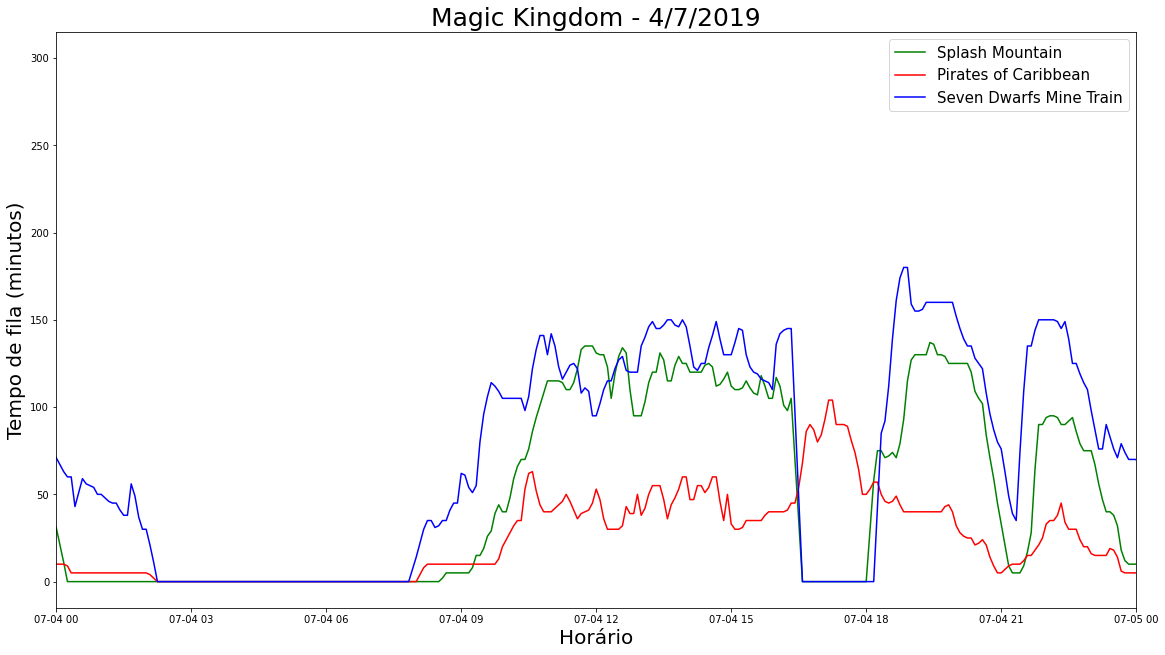

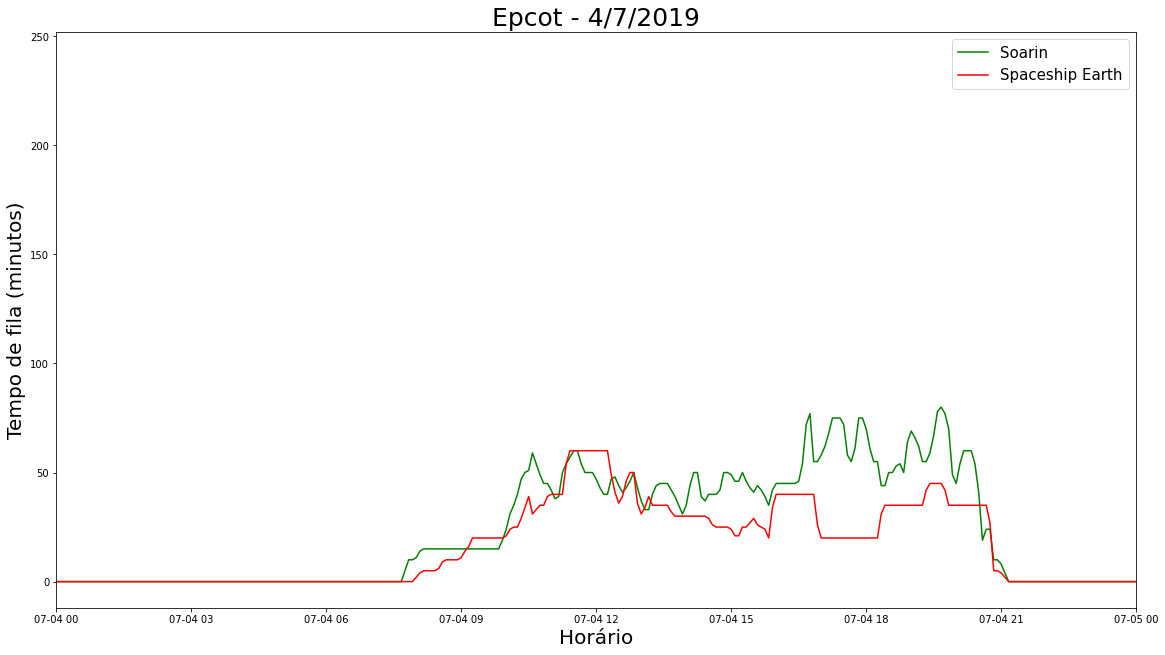

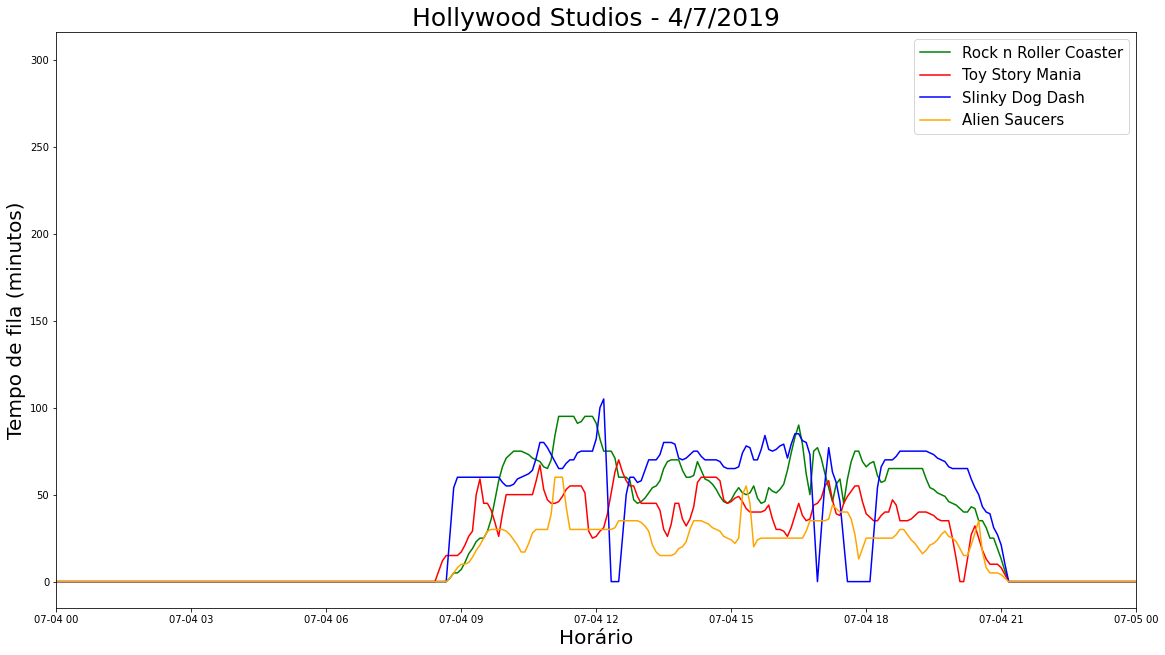

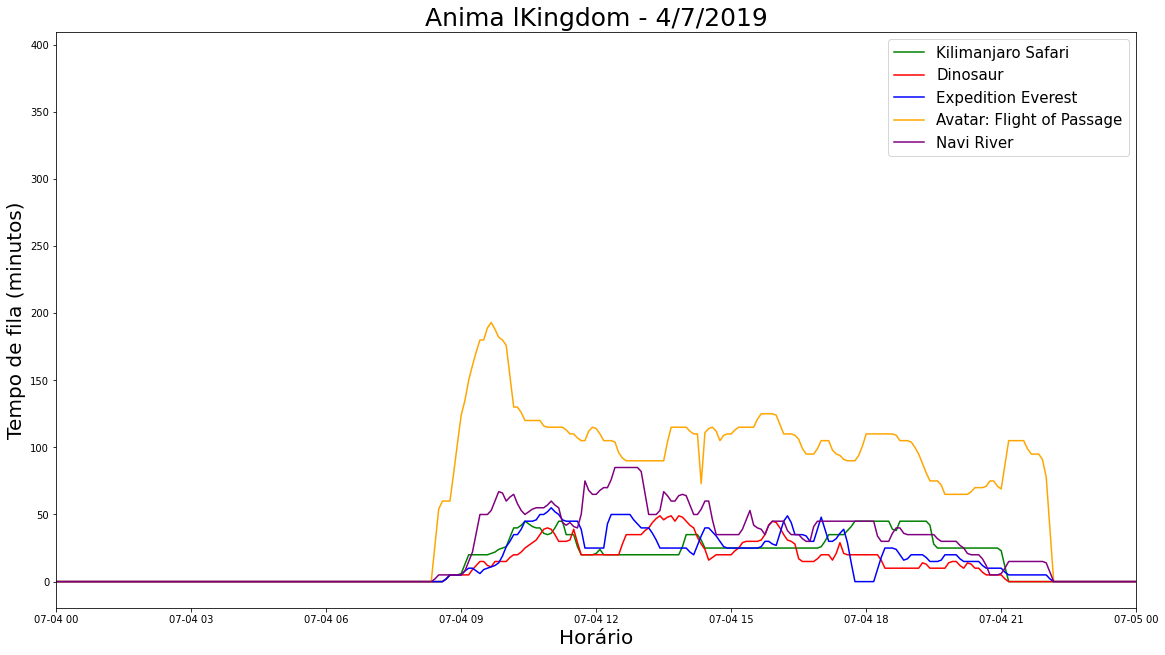

In [42]:
plota_magic(data_escolhida, dia_seguinte)
plota_epcot(data_escolhida, dia_seguinte)
plota_hollywood(data_escolhida, dia_seguinte)
plota_animal(data_escolhida, dia_seguinte)

Quandos dias gostaria de analisar?1
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 31
Mês: 12
Ano: 2019


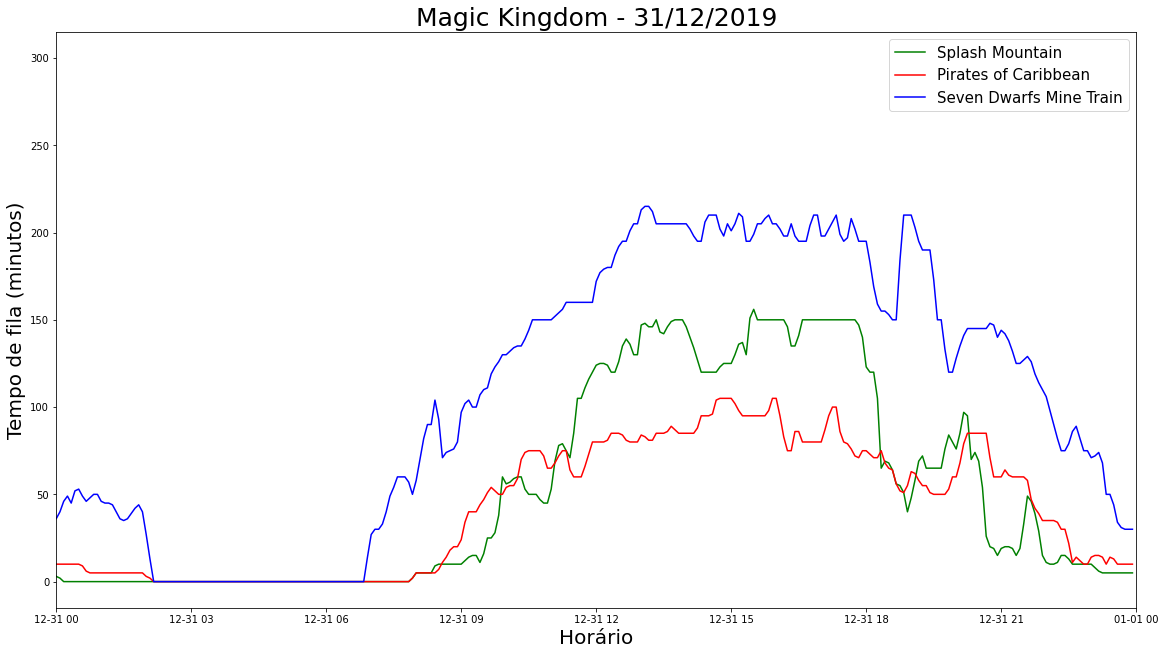

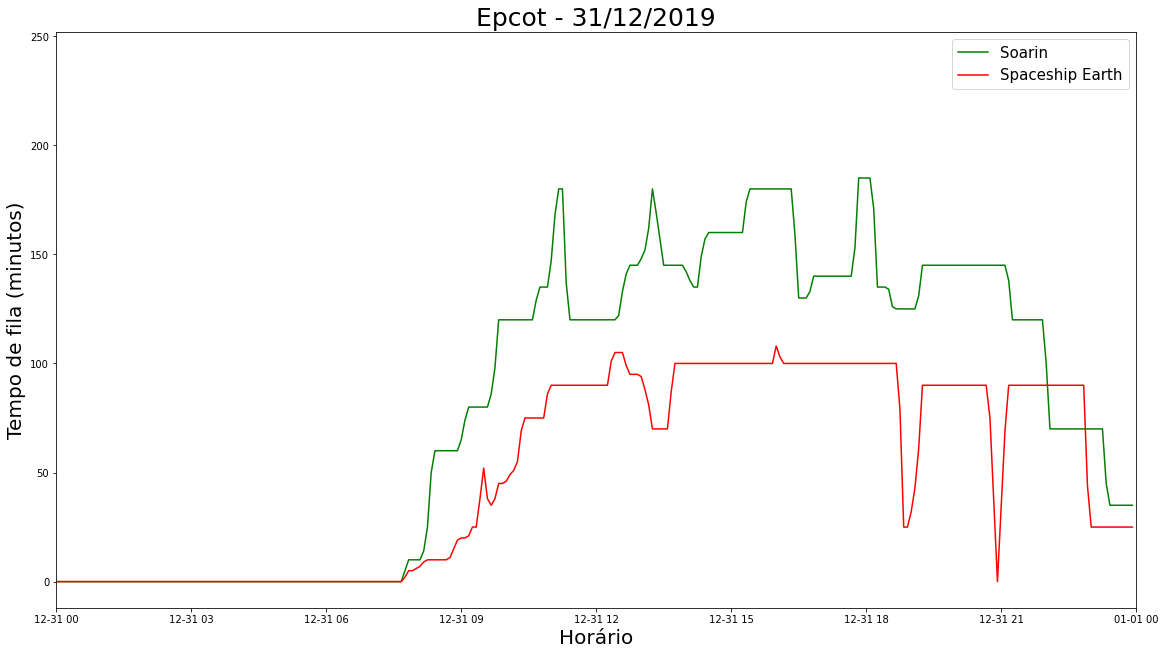

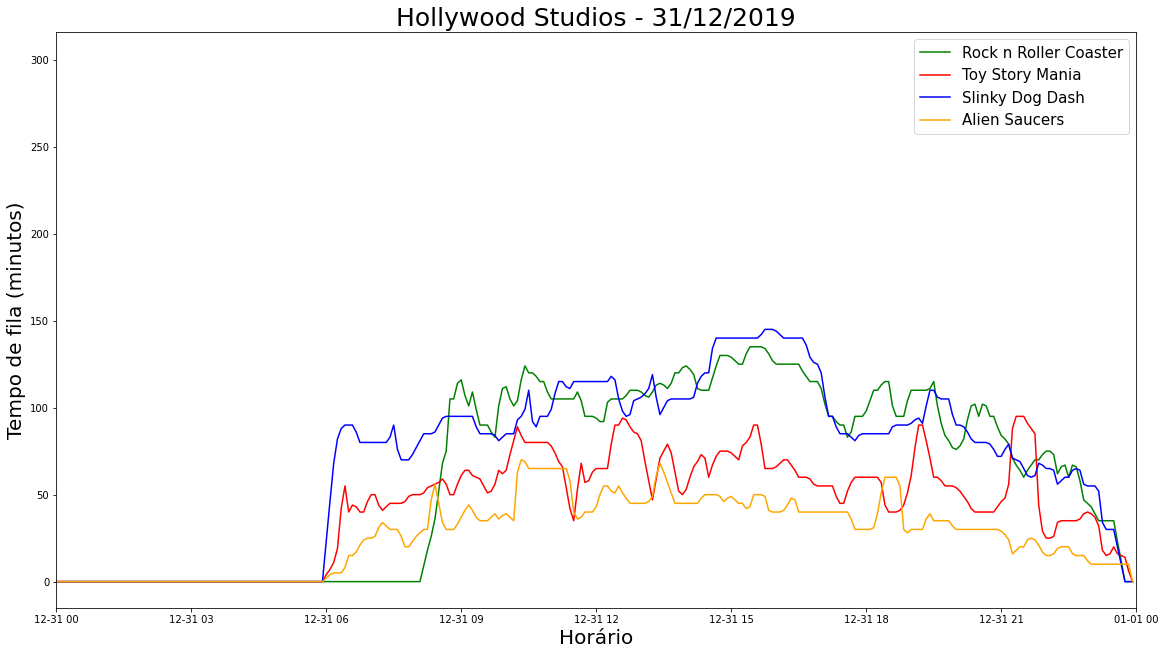

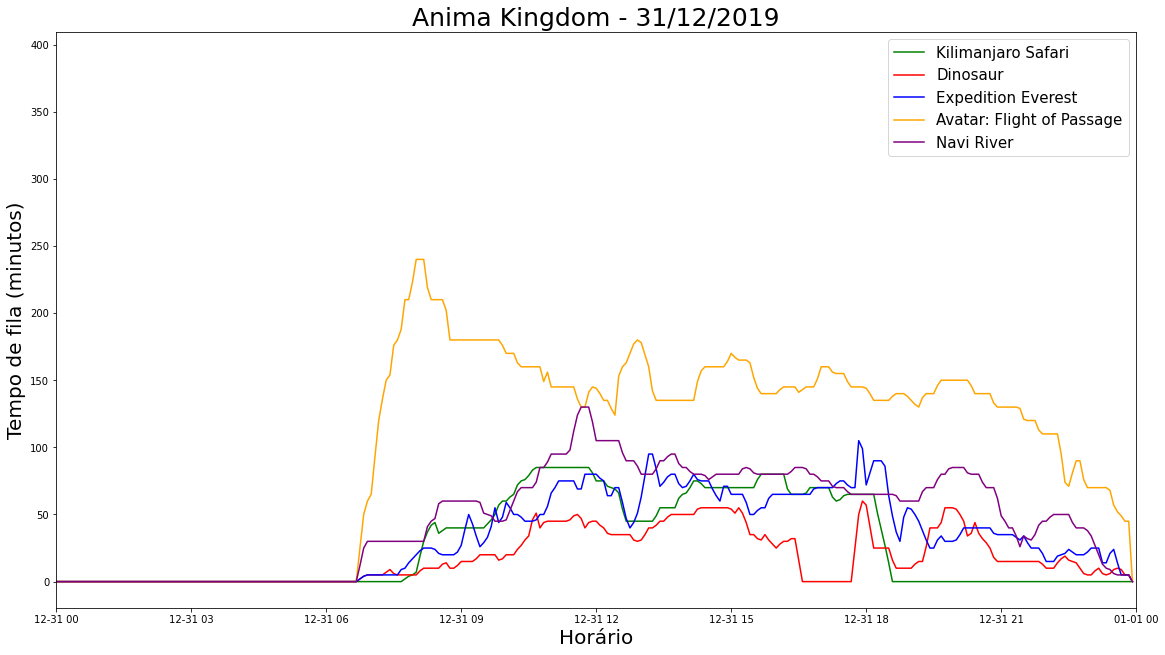

In [46]:
days = int(input('Quandos dias gostaria de analisar?'))
for days in range(0, days):
  print('Escolha uma data entre 01/01/2015 e 31/12/2019: ')
  d = int(input('Dia: '))
  m = int(input('Mês: '))
  y = int(input('Ano: '))
  data_escolhida = datetime(y, m, d)
  dia_seguinte = data_escolhida + timedelta(days=1)
  
  plota_magic(data_escolhida, dia_seguinte)
  plota_epcot(data_escolhida, dia_seguinte)
  plota_hollywood(data_escolhida, dia_seguinte)
  plota_animal(data_escolhida, dia_seguinte)